## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset - California Dataset


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -0.621149  0.912161 -1.240146  0.768957  1.652155  1.462857
1  0.561359 -1.044611  1.466181  0.354331  0.146963  0.615255
2 -0.793520 -1.725142 -0.087160  0.736519  0.551336 -0.839744
3  0.786669  0.206724  0.292426 -1.501712 -0.397510 -0.631521
4 -1.075214  0.431976 -0.448263 -0.204945  1.033492 -0.511694


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.027471
0:	learn: 1.0157500	total: 46.6ms	remaining: 46.5s
1:	learn: 1.0035270	total: 46.9ms	remaining: 23.4s
2:	learn: 0.9922788	total: 47.4ms	remaining: 15.7s
3:	learn: 0.9820187	total: 47.8ms	remaining: 11.9s
4:	learn: 0.9716566	total: 48.2ms	remaining: 9.59s
5:	learn: 0.9606405	total: 48.6ms	remaining: 8.06s
6:	learn: 0.9468924	total: 49ms	remaining: 6.96s
7:	learn: 0.9355435	total: 49.4ms	remaining: 6.12s
8:	learn: 0.9257783	total: 49.8ms	remaining: 5.48s
9:	learn: 0.9169224	total: 50.1ms	remaining: 4.96s
10:	learn: 0.9069713	total: 50.5ms	remaining: 4.54s
11:	learn: 0.8961499	total: 50.8ms	remaining: 4.18s
12:	learn: 0.8872067	total: 51.2ms	remaining: 3.88s
13:	learn: 0.8793373	total: 51.5ms	remaining: 3.63s
14:	learn: 0.8703545	total: 51.9ms	remaining: 3.4s
15:	learn: 0.8617708	total: 52.2ms	remaining: 3.21s
16:	learn: 0.8542071	total: 52.5ms	remaining: 3.04s
17:	learn: 0.8456270	total: 52.9ms	remaining: 2.88s
18:	learn: 0.8374151	total: 53.2ms	remaining: 2

177:	learn: 0.2189292	total: 111ms	remaining: 511ms
178:	learn: 0.2175720	total: 111ms	remaining: 509ms
179:	learn: 0.2158563	total: 111ms	remaining: 508ms
180:	learn: 0.2145384	total: 112ms	remaining: 506ms
181:	learn: 0.2132320	total: 112ms	remaining: 504ms
182:	learn: 0.2120526	total: 112ms	remaining: 502ms
183:	learn: 0.2103303	total: 113ms	remaining: 500ms
184:	learn: 0.2091646	total: 113ms	remaining: 499ms
185:	learn: 0.2074757	total: 114ms	remaining: 497ms
186:	learn: 0.2057084	total: 114ms	remaining: 495ms
187:	learn: 0.2039731	total: 114ms	remaining: 493ms
188:	learn: 0.2022790	total: 115ms	remaining: 492ms
189:	learn: 0.2008056	total: 115ms	remaining: 490ms
190:	learn: 0.1993424	total: 115ms	remaining: 488ms
191:	learn: 0.1980727	total: 116ms	remaining: 487ms
192:	learn: 0.1968400	total: 116ms	remaining: 486ms
193:	learn: 0.1952388	total: 117ms	remaining: 484ms
194:	learn: 0.1938827	total: 117ms	remaining: 482ms
195:	learn: 0.1925181	total: 117ms	remaining: 481ms
196:	learn: 

473:	learn: 0.0381366	total: 215ms	remaining: 238ms
474:	learn: 0.0380371	total: 215ms	remaining: 238ms
475:	learn: 0.0379536	total: 216ms	remaining: 238ms
476:	learn: 0.0378855	total: 216ms	remaining: 237ms
477:	learn: 0.0376576	total: 217ms	remaining: 236ms
478:	learn: 0.0374841	total: 217ms	remaining: 236ms
479:	learn: 0.0373738	total: 217ms	remaining: 235ms
480:	learn: 0.0371864	total: 218ms	remaining: 235ms
481:	learn: 0.0369596	total: 218ms	remaining: 234ms
482:	learn: 0.0367672	total: 218ms	remaining: 234ms
483:	learn: 0.0366889	total: 219ms	remaining: 233ms
484:	learn: 0.0366064	total: 219ms	remaining: 232ms
485:	learn: 0.0365433	total: 219ms	remaining: 232ms
486:	learn: 0.0363542	total: 220ms	remaining: 231ms
487:	learn: 0.0362504	total: 220ms	remaining: 231ms
488:	learn: 0.0360501	total: 220ms	remaining: 230ms
489:	learn: 0.0359891	total: 221ms	remaining: 230ms
490:	learn: 0.0358038	total: 221ms	remaining: 229ms
491:	learn: 0.0357174	total: 221ms	remaining: 228ms
492:	learn: 

758:	learn: 0.0118546	total: 316ms	remaining: 100ms
759:	learn: 0.0118452	total: 317ms	remaining: 100ms
760:	learn: 0.0118379	total: 317ms	remaining: 99.7ms
761:	learn: 0.0117822	total: 318ms	remaining: 99.2ms
762:	learn: 0.0117601	total: 318ms	remaining: 98.8ms
763:	learn: 0.0116956	total: 318ms	remaining: 98.4ms
764:	learn: 0.0116578	total: 319ms	remaining: 97.9ms
765:	learn: 0.0116127	total: 319ms	remaining: 97.5ms
766:	learn: 0.0116057	total: 320ms	remaining: 97.1ms
767:	learn: 0.0115412	total: 320ms	remaining: 96.6ms
768:	learn: 0.0115147	total: 320ms	remaining: 96.2ms
769:	learn: 0.0114356	total: 321ms	remaining: 95.7ms
770:	learn: 0.0114127	total: 321ms	remaining: 95.3ms
771:	learn: 0.0114060	total: 321ms	remaining: 94.9ms
772:	learn: 0.0113851	total: 322ms	remaining: 94.4ms
773:	learn: 0.0113785	total: 322ms	remaining: 94ms
774:	learn: 0.0113156	total: 322ms	remaining: 93.6ms
775:	learn: 0.0112964	total: 323ms	remaining: 93.1ms
776:	learn: 0.0112626	total: 323ms	remaining: 92.7

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

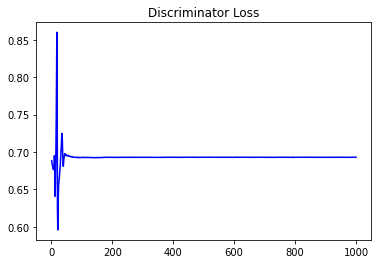

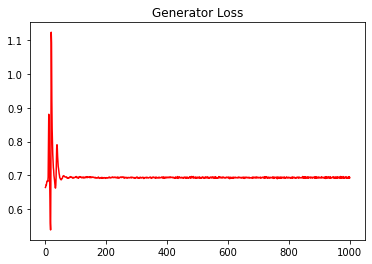

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.14029908178437


#### Sanity Checks 

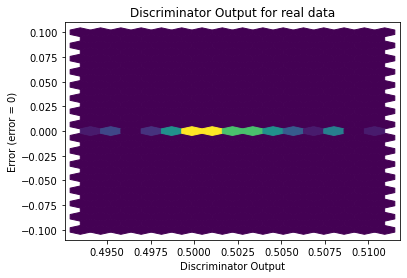

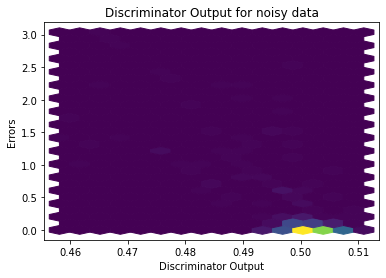

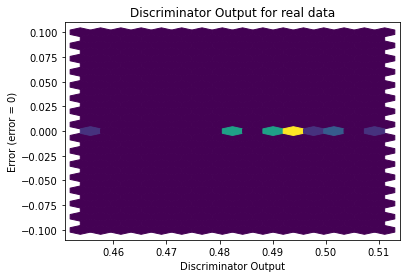

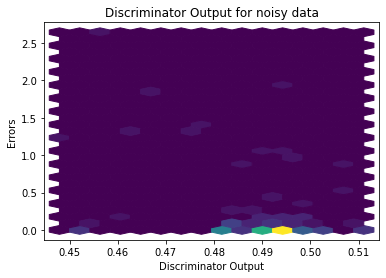

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


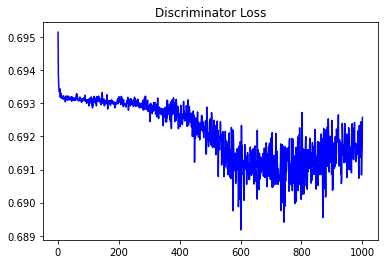

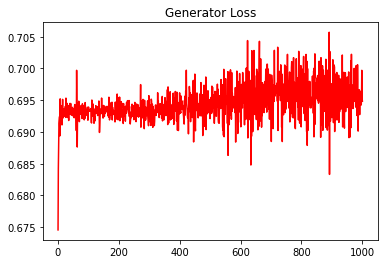

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.1273164612737217


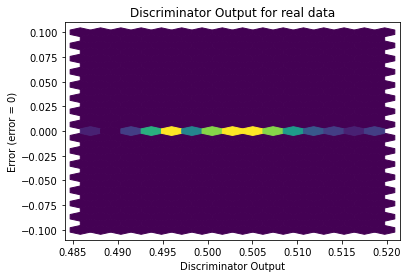

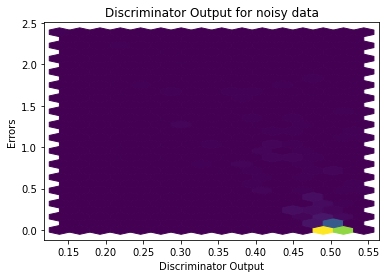

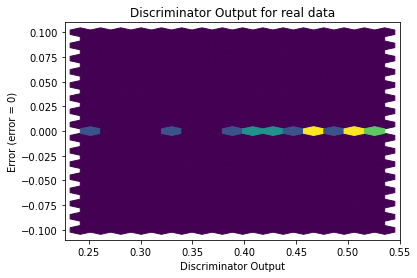

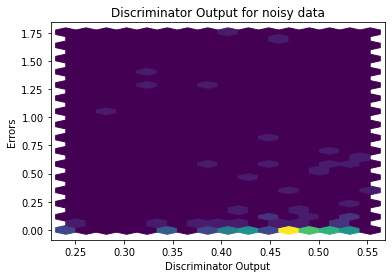

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1373]], device='cuda:0', requires_grad=True)
